In [1]:
import sys
sys.executable

'd:\\0 Data Practice\\MarketSprint_Acquisition_Analysis\\.venv\\Scripts\\python.exe'

In [4]:
import pandas as pd
df = pd.read_csv("../data/marketsprint_financials.csv")
df.head()

,Year,Quarter,Revenue,COGS,Sales_Marketing_Expense,GandA_Expense,R_and_D_Expense,Interest_Expense,Tax_Expense
0,2022,Q1,2000000,900000,420000,260000,120000,40000,65000
1,2022,Q2,2100000,945000,430000,265000,125000,40000,67000
2,2022,Q3,2250000,1012500,450000,270000,130000,41000,70000
3,2022,Q4,2400000,1080000,470000,275000,135000,41000,74000
4,2023,Q1,2550000,1147500,495000,285000,140000,42000,78000


In [6]:
# --- Profit metrics ---
df["Gross_Profit"] = df["Revenue"] - df["COGS"]

df["Operating_Expense"] = (
    df["Sales_Marketing_Expense"] +
    df["GandA_Expense"] +
    df["R_and_D_Expense"]
)

df["Operating_Profit"] = df["Gross_Profit"] - df["Operating_Expense"]

df["Net_Income"] = df["Operating_Profit"] - df["Interest_Expense"] - df["Tax_Expense"]

# --- Margin metrics (as percentages) ---
df["Gross_Margin"] = df["Gross_Profit"] / df["Revenue"]
df["Operating_Margin"] = df["Operating_Profit"] / df["Revenue"]
df["Net_Margin"] = df["Net_Income"] / df["Revenue"]

df.head()


,Year,Quarter,Revenue,COGS,Sales_Marketing_Expense,GandA_Expense,R_and_D_Expense,Interest_Expense,Tax_Expense,Gross_Profit,Operating_Expense,Operating_Profit,Net_Income,Gross_Margin,Operating_Margin,Net_Margin
0,2022,Q1,2000000,900000,420000,260000,120000,40000,65000,1100000,800000,300000,195000,0.55,0.150000,0.097500
1,2022,Q2,2100000,945000,430000,265000,125000,40000,67000,1155000,820000,335000,228000,0.55,0.159524,0.108571
2,2022,Q3,2250000,1012500,450000,270000,130000,41000,70000,1237500,850000,387500,276500,0.55,0.172222,0.122889
3,2022,Q4,2400000,1080000,470000,275000,135000,41000,74000,1320000,880000,440000,325000,0.55,0.183333,0.135417
4,2023,Q1,2550000,1147500,495000,285000,140000,42000,78000,1402500,920000,482500,362500,0.55,0.189216,0.142157


In [7]:
# Create a time column for sorting & plotting
df["Period"] = df["Year"].astype(str) + " " + df["Quarter"]

# Ensure correct chronological order
df["Period_Order"] = pd.to_datetime(
    df["Year"].astype(str) + "-" +
    df["Quarter"].str.replace("Q", "") + "-01"
)

df = df.sort_values("Period_Order").reset_index(drop=True)

df[["Year", "Quarter", "Period"]].head()

,Year,Quarter,Period
0,2022,Q1,2022 Q1
1,2022,Q2,2022 Q2
2,2022,Q3,2022 Q3
3,2022,Q4,2022 Q4
4,2023,Q1,2023 Q1


In [8]:
# Quarter-over-Quarter (QoQ) Growth
df["Revenue_QoQ_Growth"] = df["Revenue"].pct_change()
df["Net_Income_QoQ_Growth"] = df["Net_Income"].pct_change()

df[["Period", "Revenue", "Revenue_QoQ_Growth", "Net_Income", "Net_Income_QoQ_Growth"]].head()

,Period,Revenue,Revenue_QoQ_Growth,Net_Income,Net_Income_QoQ_Growth
0,2022 Q1,2000000,NaN,195000,NaN
1,2022 Q2,2100000,0.050000,228000,0.169231
2,2022 Q3,2250000,0.071429,276500,0.212719
3,2022 Q4,2400000,0.066667,325000,0.175407
4,2023 Q1,2550000,0.062500,362500,0.115385


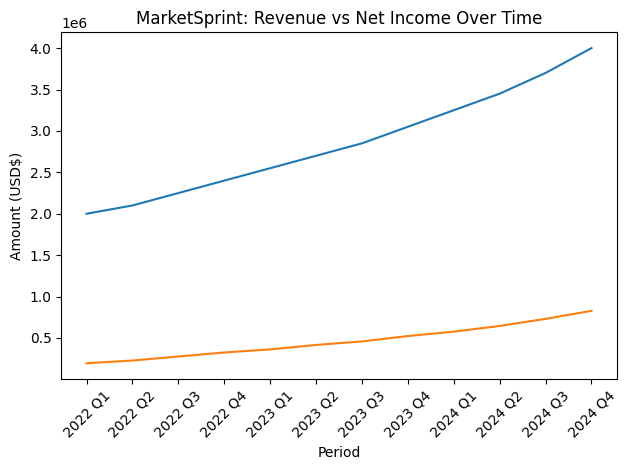

In [10]:
import matplotlib.pyplot as plt

# Plot Revenue and Net Income over time
plt.figure()
plt.plot(df["Period"], df["Revenue"])
plt.plot(df["Period"], df["Net_Income"])

plt.xticks(rotation=45)
plt.title("MarketSprint: Revenue vs Net Income Over Time")
plt.xlabel("Period")
plt.ylabel("Amount (USD$)")

plt.tight_layout()
plt.show()

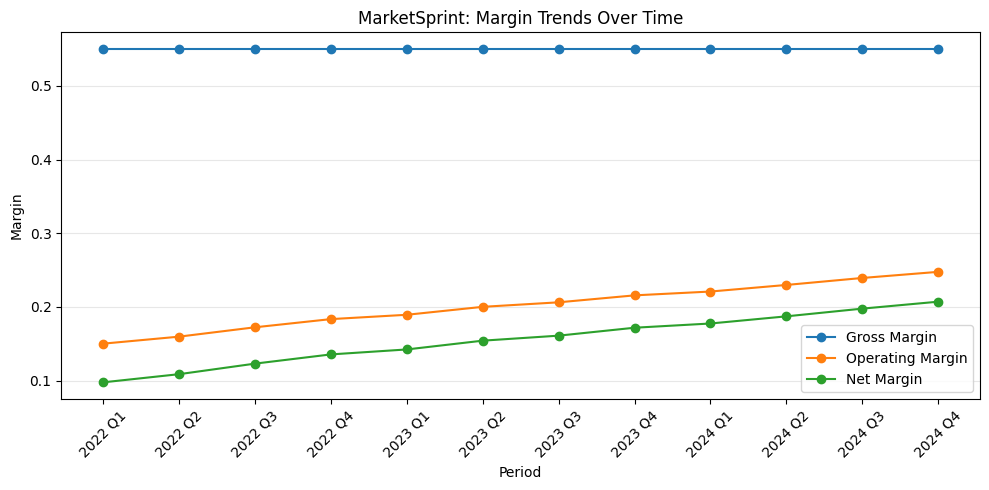

In [14]:
# Plot Margin Trends
plt.figure(figsize=(10, 5))

plt.plot(df["Period"], df["Gross_Margin"], marker="o", label="Gross Margin")
plt.plot(df["Period"], df["Operating_Margin"], marker="o", label="Operating Margin")
plt.plot(df["Period"], df["Net_Margin"], marker="o", label="Net Margin")

plt.xticks(rotation=45)

plt.title("MarketSprint: Margin Trends Over Time")
plt.xlabel("Period")
plt.ylabel("Margin")

plt.grid(True, axis="y", alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
# Scenario Modeling
# Baseline: last observed quarter
last = df.iloc[-1]
last

Year                                      2024
Quarter                                     Q4
Revenue                                4000000
COGS                                   1800000
Sales_Marketing_Expense                 690000
GandA_Expense                           340000
R_and_D_Expense                         180000
Interest_Expense                         46000
Tax_Expense                             116000
Gross_Profit                           2200000
Operating_Expense                      1210000
Operating_Profit                        990000
Net_Income                              828000
Gross_Margin                              0.55
Operating_Margin                        0.2475
Net_Margin                               0.207
Period                                 2024 Q4
Period_Order               2024-04-01 00:00:00
Revenue_QoQ_Growth                    0.081081
Net_Income_QoQ_Growth                 0.132695
Name: 11, dtype: object

In [16]:
# Lock key ratios
cogs_ratio = last["COGS"] / last["Revenue"]
opex_ratio = last["Operating_Expense"] / last["Revenue"]
cogs_ratio, opex_ratio

(np.float64(0.45), np.float64(0.3025))

In [20]:
# Build reusable projection function
def project_financials(
    base_revenue,
    cogs_ratio,
    opex_ratio,
    revenue_growth,
    opex_growth,
    quarters=4
):
    revenue = base_revenue
    opex = base_revenue * opex_ratio
    rows = []

    for q in range(1, quarters + 1):
        revenue *= (1 + revenue_growth)
        opex *= (1 + opex_growth)

        gross_profit = revenue * (1 - cogs_ratio)
        operating_profit = gross_profit - opex

        rows.append({
            "Quarter": f"Future Q{q}",
            "Revenue": revenue,
            "Operating_Profit": operating_profit
        })

    return pd.DataFrame(rows)


In [22]:
# Run two scenarios - Optimistic and Risk

optimistic = project_financials(
    base_revenue=last["Revenue"],
    cogs_ratio=cogs_ratio,
    opex_ratio=opex_ratio,
    revenue_growth=0.10,
    opex_growth=0.06
)

risk = project_financials(
    base_revenue=last["Revenue"],
    cogs_ratio=cogs_ratio,
    opex_ratio=opex_ratio,
    revenue_growth=0.06,
    opex_growth=0.09
)

optimistic, risk



(     Quarter    Revenue  Operating_Profit
 0  Future Q1  4400000.0      1.137400e+06
 1  Future Q2  4840000.0      1.302444e+06
 2  Future Q3  5324000.0      1.487071e+06
 3  Future Q4  5856400.0      1.693423e+06,
      Quarter     Revenue  Operating_Profit
 0  Future Q1  4240000.00      1.013100e+06
 1  Future Q2  4494400.00      1.034319e+06
 2  Future Q3  4764064.00      1.053250e+06
 3  Future Q4  5049907.84      1.069436e+06)

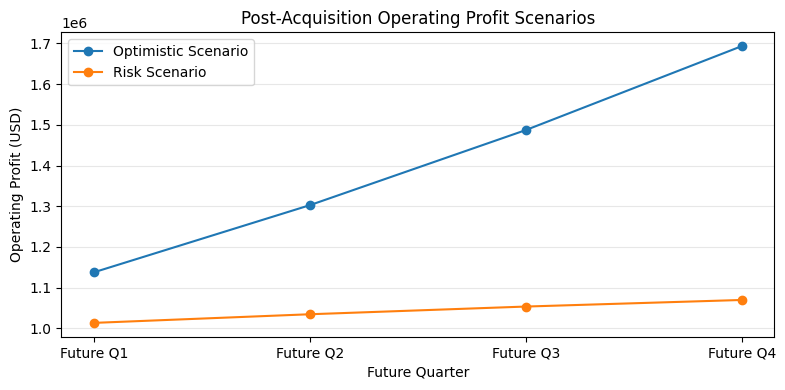

In [23]:
# Plot scenario comparison
plt.figure(figsize=(8, 4))

plt.plot(optimistic["Quarter"], optimistic["Operating_Profit"], marker="o", label="Optimistic Scenario")
plt.plot(risk["Quarter"], risk["Operating_Profit"], marker="o", label="Risk Scenario")

plt.title("Post-Acquisition Operating Profit Scenarios")
plt.xlabel("Future Quarter")
plt.ylabel("Operating Profit (USD)")

plt.grid(True, axis="y", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


### **📌 Acquisition Recommendation**

Based on the historical performance analysis, MarketSprint demonstrates strong and consistent revenue growth, expanding margins, and increasing operating leverage.

Scenario modeling suggests that under an optimistic post-acquisition scenario, where revenue growth accelerates and operating costs scale efficiently, operating profit increases materially over the next four quarters. This indicates meaningful upside potential driven by synergies and scale effects.

Under a downside scenario with higher cost pressure and slower revenue growth, profitability continues to grow, but at a significantly reduced rate. While this scenario does not indicate value destruction, it highlights sensitivity to operating expense control during integration.

Recommendation:
The acquisition appears financially viable and attractive under reasonable growth assumptions. However, value realization is highly dependent on disciplined cost management post-acquisition. Leadership should proceed with the acquisition while prioritizing integration planning and expense governance to protect operating margins.